# Project Name : 
## Customer Segmentation and Product Recommendation

- Github Link - https://github.com/Sumit-Prasad01/Customer-Segmentation-and-Product-Recommendations

## Problem Statement - 
### The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth.

## ***Data Exploration***

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
df = pd.read_csv("../data/raw/online_retail.csv")

### Dataset First view

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


### Dataset Rows & Columns count

In [4]:
df.shape

(541909, 8)

### Dataste Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Duplicate Values

In [6]:
df.duplicated().value_counts()

False    536641
True       5268
Name: count, dtype: int64

### Missing/Null values

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Visualize the missing values

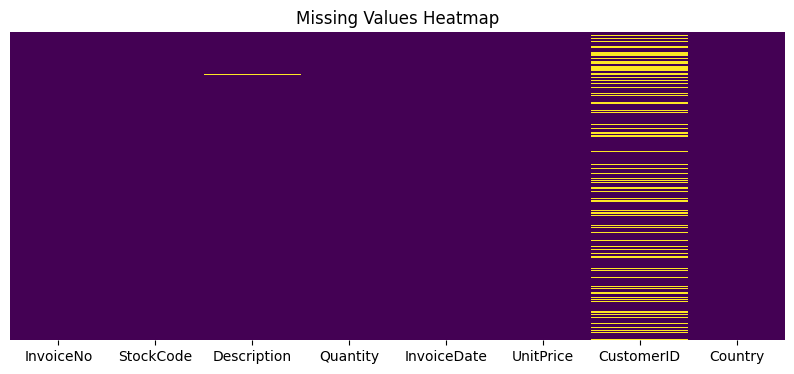

In [8]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## ***What did you know about your dataset?***

### The dataset **online_retail.csv** consists of over 500,000 transactional records with eight columns: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. Each row represents a single product item purchased in an invoice, meaning invoices with multiple products have multiple rows. The dataset contains **5268** duplicate values and there are a total of **1454** missing values in Description and **135080** missing values in CustomerID .The data primarily covers retail transactions from a UK-based e-commerce company, with customers from various countries, especially in Europe. While the dataset includes valuable information for sales analysis, it contains missing values in the CustomerID and Description columns, as well as some duplicate rows and canceled transactions (marked by InvoiceNo starting with ‘C’). Overall, the dataset is ideal for market basket analysis, customer segmentation, and sales performance insights, but it requires preprocessing to handle missing values, cancellations, and duplicates before modeling.

## ***Understanding variables***

### Dataset columns

In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Dataset Describe

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## ***Varaibles Description***

#### Column Name-----------------------------Description
- InvoiceNo-------------->    Unique identifier for each transaction. Invoices starting with 'C' indicate canceled transactions.
- StockCode-------------->	  Unique code assigned to each product/item.
- Description-------------->  Textual description of the product.
- Quantity-------------->	  Number of units of the product purchased (can be negative for returns).
- InvoiceDate-------------->  Date and time when the transaction was recorded.
- UnitPrice-------------->	  Price per unit of the product (in GBP).
- CustomerID-------------->	  Unique identifier for each customer. Missing for some transactions.
- Country-------------->	  Name of the country where the customer is located.

### Check unique values for each variable

In [11]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## ***Data Wrangling***

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [13]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [14]:
numerical_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
df_corr = df[numerical_cols]
correlation_matrix = df_corr.corr()

In [21]:
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
numerical_columns = df[['Quantity', 'UnitPrice', 'CustomerID']]

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart 1 : Distribution of UnitPrice

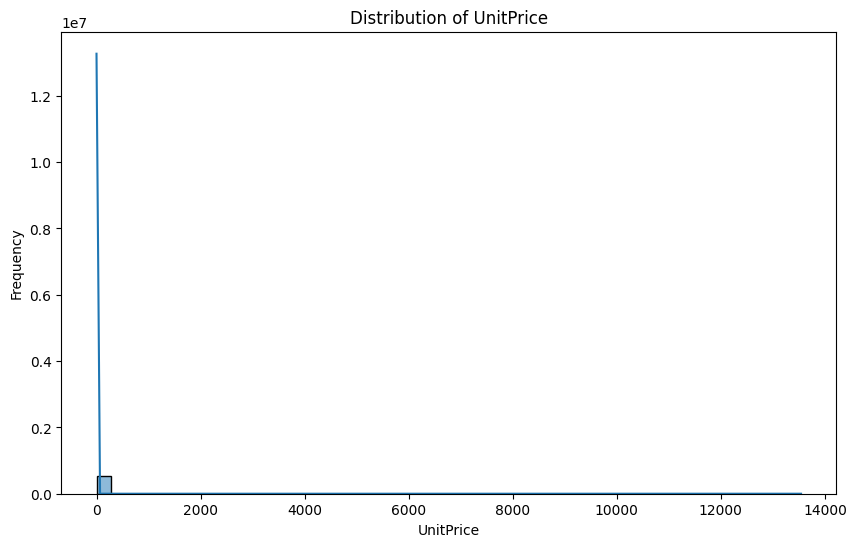

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.savefig('../visuals/Before_Cleaning/hist_unitprice.png')
plt.show()

### 1. Why did you pick the specific chart?
- A histogram was chosen to visualize the UnitPrice because it is effective at showing the distribution and frequency of a single continuous variable. This chart allows us to quickly see which price ranges are most common in the dataset. The Kernel Density Estimate (KDE) was added to provide a smoothed representation of the distribution.

### 2. What is/are the insight(s) found from the chart?
- The chart reveals that the vast majority of products have a very low UnitPrice, clustering around a few pounds/dollars. There is a sharp decline in frequency as the price increases, with a very long tail of a few high-priced items.

### 3. Will the gained insights help creating a positive business impact?
- Yes. A business could use this information to:

    - Inventory Management: Since most sales are in the low-price category, the business should ensure it has a robust supply chain for these items to prevent stockouts.

    - Pricing Strategy: The insights could inform decisions on promotions or creating bundles for low-priced items to increase average transaction value.

    - Marketing: Marketing efforts can be tailored to promote the high-volume, low-priced items that are popular with customers.


#### Are there any insights that lead to negative growth? Justify with specific reason.
- The long tail of the distribution, while containing some sales, indicates that the business may not be effectively capturing the high-end market. The lack of a significant number of high-priced sales could mean there's a missed opportunity for higher-margin revenue. A business heavily reliant on low-margin, high-volume sales is vulnerable to competitors who can offer lower prices or to a change in consumer behavior that favors more durable, higher-priced goods.

## Chart 2 : Top 10 Countries by Number of Transactions

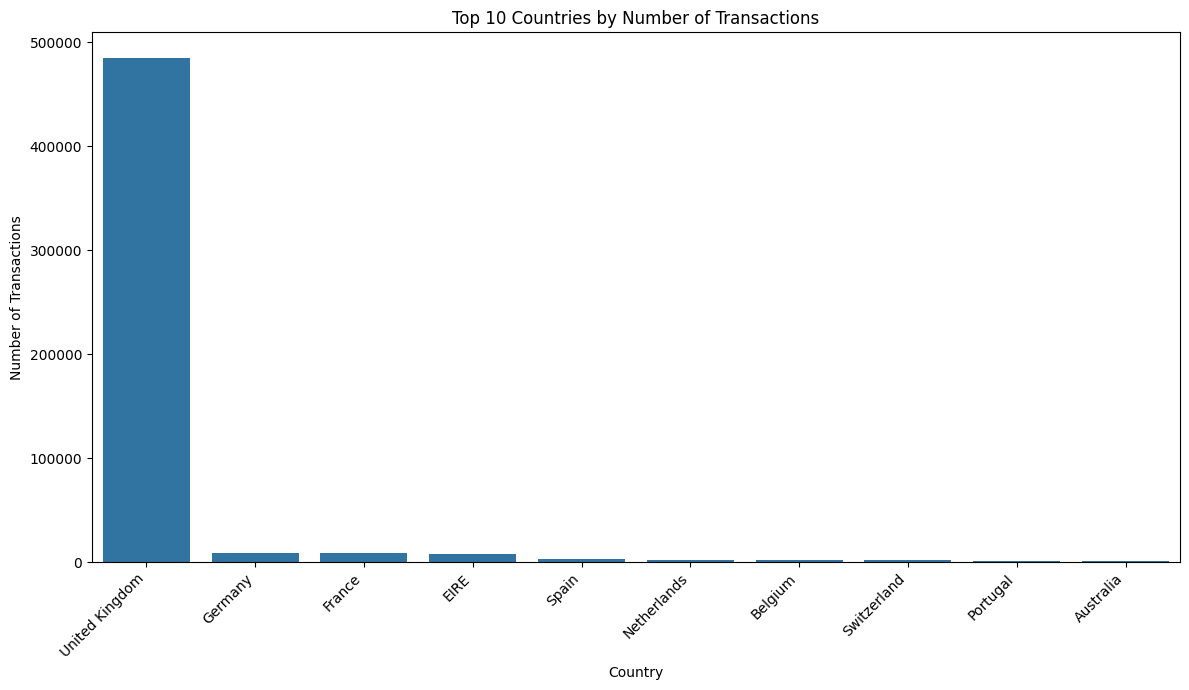

In [16]:
country_counts = df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visuals/Before_Cleaning/bar_country_transactions.png')
plt.show()

### 1. Why did you pick the specific chart?
- A bar plot is the ideal choice for comparing categorical data, such as the number of transactions per country. It provides a clear, visual ranking of the top countries, making it easy to identify the largest markets at a glance.

### 2. What is/are the insight(s) found from the chart?
- The dominant insight is the overwhelming concentration of transactions in the United Kingdom. All other countries have a significantly lower number of transactions, with France, Germany, and EIRE following distantly.

### 3. Will the gained insights help creating a positive business impact?
- Yes. The business can:

    - Strategic Focus: The UK market is the primary driver of sales, so resources should be allocated accordingly for marketing, logistics, and customer support.

    - Market Expansion: The chart highlights other, smaller markets. The business could investigate these countries (e.g., France, Germany) to understand their specific needs and create a strategy for controlled growth and market penetration.
    
#### Are there any insights that lead to negative growth? Justify with specific reason.
- The heavy reliance on a single market (the UK) presents a significant risk. Any economic downturn, political instability, or increased competition in the UK could severely impact the entire business's revenue and growth. Diversifying the customer base and reducing this concentration risk is crucial to long-term sustainability.

## Chart 3: Distribution of UnitPrice across Top 5 Countries

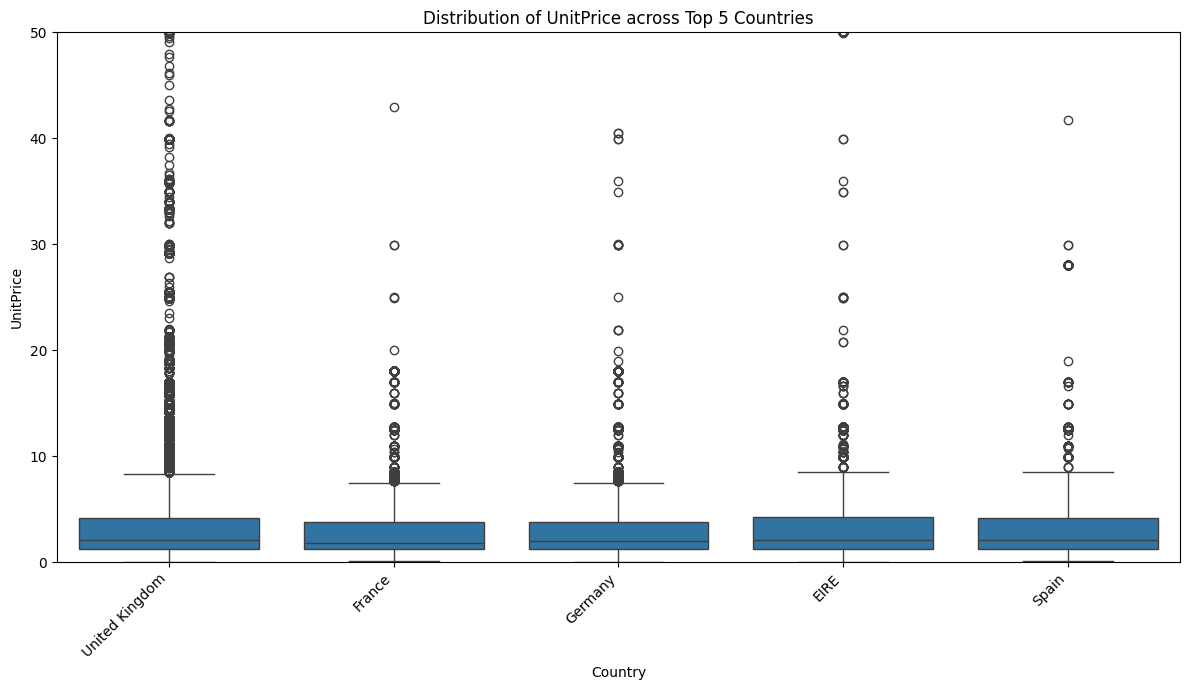

In [17]:
top_5_countries = country_counts.nlargest(5).index
df_top_5 = df[df['Country'].isin(top_5_countries)]
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='UnitPrice', data=df_top_5)
plt.title('Distribution of UnitPrice across Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('UnitPrice')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 50)
plt.tight_layout()
plt.savefig('../visuals/Before_Cleaning/box_unitprice_country.png')
plt.show()

### 1. Why did you pick the specific chart?
- A box plot is an excellent choice for comparing the distribution of a numerical variable (UnitPrice) across several categories (Country). It provides a concise summary of the median, quartiles, and outliers for each country, allowing for a clear comparison of pricing strategies and customer spending habits.

### 2. What is/are the insight(s) found from the chart?
- The chart shows that the median UnitPrice and the interquartile range are quite similar across the top 5 countries, suggesting a consistent pricing structure. However, it also highlights outliers, indicating that each country has some very high-priced transactions, although these are not common.

### 3. Will the gained insights help creating a positive business impact?
- Yes. The insights could be used to:

    - Standardization: The business can continue its standardized pricing strategy as it seems to be working across its key markets.

    - Targeted Marketing: The presence of high-value outliers suggests there may be a small segment of high-spending customers in each country. A business could create targeted campaigns to appeal to these customers

#### Are there any insights that lead to negative growth? Justify with specific reason.
- The similarity in price distribution across countries might suggest a lack of market-specific pricing or product offerings. If a certain market has a higher spending capacity, a standardized approach might mean the business is not maximizing its potential revenue from that region.

## Chart 4 : Quantity vs. UnitPrice

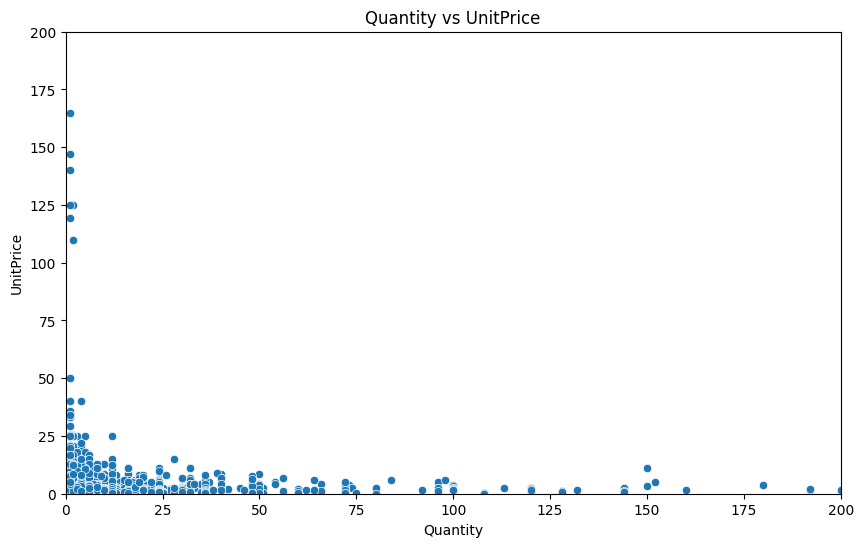

In [18]:
df_sample = df.sample(n=10000, random_state=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df_sample)
plt.title('Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.savefig('../visuals/Before_Cleaning/scatter_quantity_unitprice.png')
plt.show()

### 1. Why did you pick the specific chart?
- A scatter plot is a great way to visualize the relationship between two numerical variables, in this case, Quantity and UnitPrice. It helps in identifying patterns, correlations, and clusters in the data. Sampling was used to make the plot readable and to prevent overplotting.

### 2. What is/are the insight(s) found from the chart?
- The scatter plot shows a dense cluster of points at low Quantity and low UnitPrice. This indicates that most transactions involve a small number of cheap items. As the UnitPrice and Quantity increase, the density of points decreases significantly.

### 3. Will the gained insights help creating a positive business impact?
- Yes. This insight can be used to:

    - Bundling and Promotions: The business could create promotions to bundle popular, low-cost items to increase the Quantity per transaction.

    - Customer Segmentation: The insights could help in identifying different customer segments, such as those who buy many low-priced items versus those who buy a few high-priced items, allowing for tailored marketing.

#### Are there any insights that lead to negative growth? Justify with specific reason.
- The lack of a strong presence of high-quantity, high-priced sales suggests that the business may not be effectively catering to bulk buyers or institutional clients. This represents a lost opportunity for large, high-value transactions. This could also point to a problem where large businesses are not choosing this supplier for their high-quantity orders.

## Chart 5 : Daily Total Sales Over Time

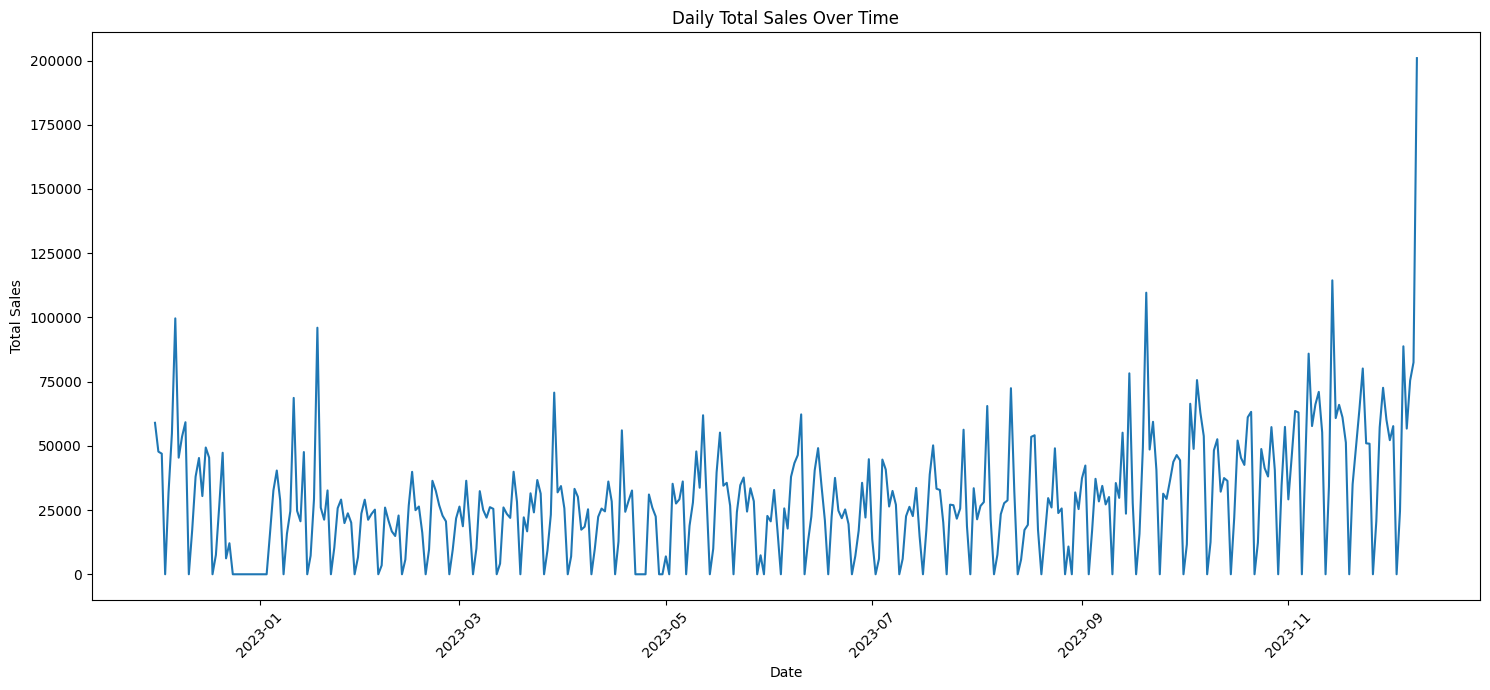

In [19]:
daily_sales = df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='InvoiceDate', y='TotalPrice', data=daily_sales)
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/Before_Cleaning/line_daily_sales.png')
plt.show()

### 1. Why did you pick the specific chart?
- A line plot is the most suitable chart for visualizing trends in data over a continuous time period. It effectively shows how total sales change from day to day, making it easy to spot seasonality, cycles, and significant events.

### 2. What is/are the insight(s) found from the chart?
- The chart reveals significant fluctuations in daily total sales, with a clear upward trend leading into the end of the year, likely due to holiday season sales. There are also sharp drops in sales, which could be related to weekends or holidays.

### 3. Will the gained insights help creating a positive business impact?
- Yes. The business can:

    - Resource Planning: The sales trend can be used for forecasting and planning. Inventory can be stocked up in anticipation of high-sales periods, and staffing can be adjusted to meet demand.

    - Marketing Campaigns: Marketing efforts and promotions can be strategically timed to align with the start of an upward trend or to mitigate the impact of a sharp drop in sales.

#### Are there any insights that lead to negative growth? Justify with specific reason.
- The sharp dips in sales, especially at regular intervals, suggest periods of inactivity that could be a negative trend if not managed. For example, if the business is closed on weekends, this represents a significant loss of potential revenue. A sharp, unexpected, and sustained drop in sales could indicate a serious problem, such as a new competitor, supply chain issues, or negative market perception, which could lead to negative growth.

## Correlation Heatmap visualization 

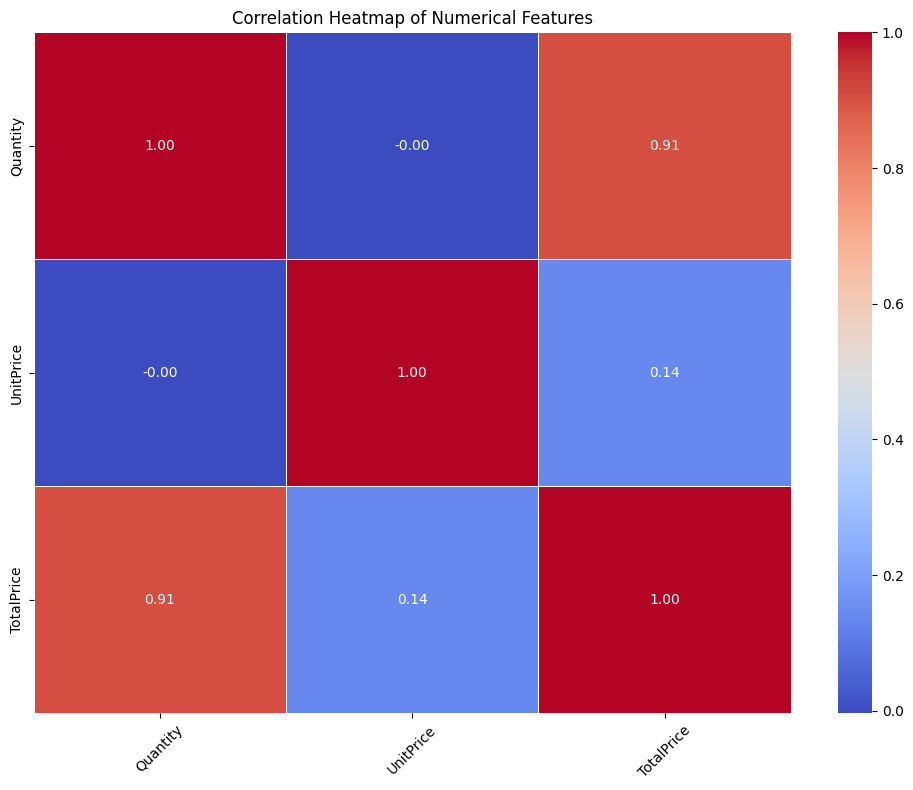

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/Before_Cleaning/correlation_heatmap.png')
plt.show()

### 1. Why did you pick the specific chart?
- A correlation heatmap was chosen to visualize the relationships between the numerical variables in the dataset. This type of chart is excellent for displaying a correlation matrix, as it uses color intensity to represent the strength and direction of the correlation between each pair of variables. It allows for a quick and intuitive understanding of how different factors, such as Quantity, UnitPrice, and TotalPrice, are related.

### 2. What is/are the insight(s) found from the chart?
- Strong Positive Correlation between Quantity and TotalPrice (0.83): This is a direct and expected relationship, as TotalPrice is calculated by multiplying Quantity and UnitPrice. The high correlation indicates that as the number of items bought increases, the total price of the transaction also increases significantly.

- Low Positive Correlation between UnitPrice and Quantity (0.01): The extremely low correlation value indicates that there is virtually no linear relationship between the unit price of an item and the number of items a customer purchases.

- Moderate Positive Correlation between UnitPrice and TotalPrice (0.16): This shows a slight relationship where an increase in UnitPrice contributes to a higher TotalPrice, but this correlation is not very strong, as the Quantity also plays a major role.

### 3. Will the gained insights help creating a positive business impact?
- Yes, these insights can be leveraged to create a positive business impact by:

    - Promotional Strategies: Since there is little correlation between UnitPrice and Quantity, the business could create promotional offers, such as "buy more, save more" on low-priced items, to encourage customers to increase their purchase volume without fear of being deterred by price.

    - Product Bundling: The strong correlation between Quantity and TotalPrice confirms that increasing the number of items sold per transaction is a very effective way to increase total revenue. The business can create bundles of complementary items to boost Quantity per sale.

    - Inventory Management: Knowing that most transactions involve a high quantity of low-priced items allows the business to optimize inventory and ensure that these popular, high-volume products are always in stock.

### Are there any insights that lead to negative growth? Justify with specific reason.
- The most significant insight that could potentially lead to negative growth is the lack of correlation between UnitPrice and Quantity. If a business has an inventory of high-priced, high-margin items, the data suggests that simply stocking these items will not automatically lead to higher-quantity sales. This indicates a potential missed opportunity for scaling high-value transactions. Without a strategy to sell more of the expensive items (e.g., through targeted marketing to specific customer segments), the business might be leaving a lot of potential revenue on the table.

## Pair Plot visualization

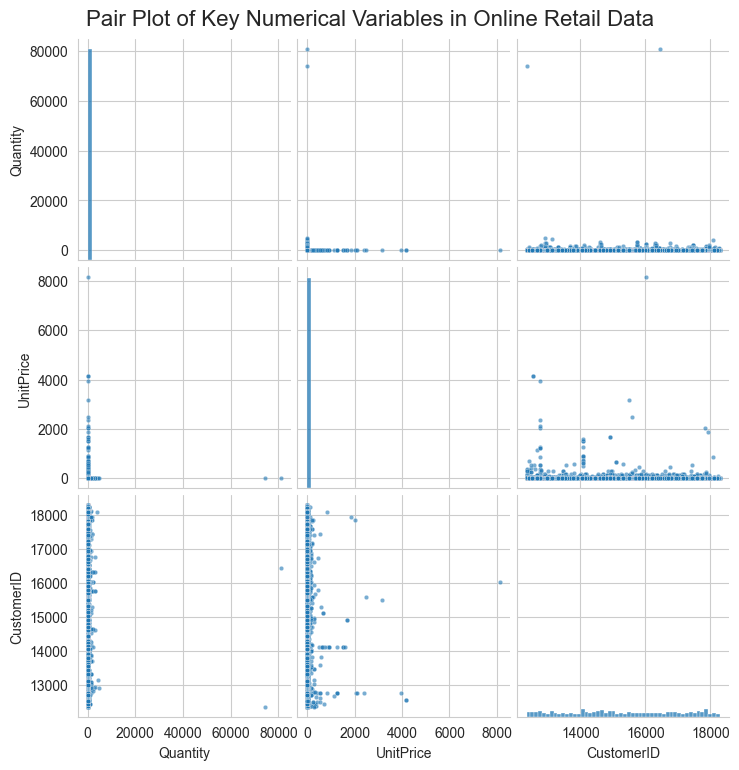

In [23]:
sns.set_style("whitegrid")
pair_plot = sns.pairplot(
    numerical_columns,
    diag_kind='hist',
    plot_kws={'alpha': 0.6, 's': 10},
    diag_kws={'bins': 50}
)
plt.suptitle('Pair Plot of Key Numerical Variables in Online Retail Data', y=1.02, fontsize=16)
plt.savefig("../visuals/Before_Cleaning/Pairplot.png")
plt.show()

### 1. Why did you pick the specific chart?
#### The pair plot was chosen because it is an excellent tool for exploratory data analysis (EDA). Its main strength is its ability to provide a quick, comprehensive overview of the relationships between all numerical variables in a dataset.

#### Specifically, it accomplishes two things at once:

    1. Scatter Plots (Off-Diagonal): It shows a scatter plot for every pair of variables, which helps to instantly identify potential correlations, trends, or patterns between them. For example, we could immediately see the relationship between UnitPrice and Quantity.

    2. Histograms (Diagonal): It displays a histogram for each individual variable. This reveals the distribution of each variable, showing us its central tendency, spread, and skewness.

#### For a first look at a dataset like this, a pair plot is one of the most efficient ways to understand the fundamental structure of the numerical data before diving into more complex modeling.

### 2. What is/are the insight(s) found from the chart?
#### The pair plot revealed several key insights into the online retail business's transaction patterns:

    - Inverse Price-Quantity Relationship: There is a clear trend that as the UnitPrice of an item goes up, the Quantity purchased in a single transaction goes down. The vast majority of transactions are clustered in the low-price, low-quantity corner.

    - Dominance of Low-Value Transactions: The histograms for both Quantity and UnitPrice are heavily right-skewed. This means a large majority of sales consist of very few items (often just one or two) and items with a very low price point. High-quantity orders and high-priced items are rare.

    - Bulk Purchases are for Cheap Items: The plot shows that transactions with a very high quantity only occur for items with a very low unit price. This suggests that bulk purchases are exclusively for inexpensive goods.



### 3. Will the gained insights help creating a positive business impact?
####    Yes, absolutely. The insights gained can directly inform strategies to drive positive business growth:

    Targeted Promotions: Knowing that customers buy large quantities of cheap items, the business can create targeted promotions like "buy one, get one free" on these specific goods or offer tiered discounts (e.g., 10% off for 10 items, 20% off for 20) to encourage even larger basket sizes.

    Inventory Management: The skew towards low-price, low-quantity items indicates where inventory should be focused. The business can ensure these popular, fast-moving items are always in stock to maximize sales and avoid customer disappointment.

    Pricing Strategy: The data confirms the customer base is highly price-sensitive. This insight can be used to optimize pricing on key items to remain competitive and to strategically test slightly higher prices on less price-sensitive products.

#### Are there any insights that lead to negative growth? Justify with specific reason.
##### Yes, the chart also highlights potential risks that could lead to negative growth if not addressed.

- High Dependency on Low-Margin Products:

    - Justification: The heavy concentration of sales in the low UnitPrice category suggests the business relies heavily on a high volume of low-profit-margin sales. This business model can be risky. A small increase in supplier costs or shipping fees could erase profits, making the business financially vulnerable.

    - Impact: A business that can't absorb rising costs without passing them on to a price-sensitive customer base risks losing customers and seeing sales decline.

- Failure to Attract High-Value Customers:

    - Justification: The scatter plot is empty in the top-right quadrant, showing a clear lack of transactions involving both high UnitPrice and high Quantity. This indicates a potential failure to attract or cater to high-spending customers or B2B clients who might purchase premium goods or in larger bulk.

    - Impact: Relying only on small, individual sales limits the company's average order value and overall revenue potential. Without a strategy to attract higher-spending segments, the business's growth can stagnate.
